# Dataset 생성  

다음 2가지 방법을 사용하여 Linear Regression을 위한 Dataset를 생성합니다.  
<ul>  
    <li>sklearn의 make_regression() 함수</li>  
    <li>작성한 LR_dataset_generator 클래스</li>  
</ul>  

## make_regression() 함수
다음 설정을 사용하여 Linear Regression을 위한 Dataset를 생성합니다.  
(표준 정규분포를 사용하며 가중치는 내부적으로 무작위 생성)
<ul>  
    <li>독립변수의 갯수</li>  
    <li>노이즈 비율</li>  
    <li>샘플 갯수</li>  
    <li>모델 파라미터 (바이어스(bias))</li>  
</ul>  

<font color="#777777">
    <h2> LR_dataset_generator 클래스 </h2>
다음 설정을 사용하여 Linear Regression을 위한 Dataset를 생성합니다.  
<ul>  
    <li>독립변수의 갯수</li>  
    <li>노이즈 비율</li>  
    <li>샘플 갯수</li>  
    <li>데이터 파라미터 (평균(mean)과 표준편차(standard deviation)</li>  
    <li>모델 파라미터 (가중치(weight)와 바이어스(bias))</li>  
</ul>  
</font>
  
먼저 다음 셀을 실행시켜 필요한 library들을 import하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#from LR_dataset_generator import LR_dataset_generator
from sklearn.datasets import make_regression

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

plt.style.use('seaborn')
np.random.seed(0)

## make_regression() 함수를 사용하여 dataset 생성
<ul>  
    <li>1차원 dataset ~ noise: 0.0, 샘플 갯수: 300, 바이어스: 0.0</li>  
    <li>1차원 dataset ~ noise: 10.0, 샘플 갯수: 300, 바이어스: 30.0</li>  
    <li>2차원 dataset ~ noise: 10.0, 샘플 갯수: 300, 바이어스: 30.0</li>  
</ul>  

### (1) make_regression() : 1차원 dataset

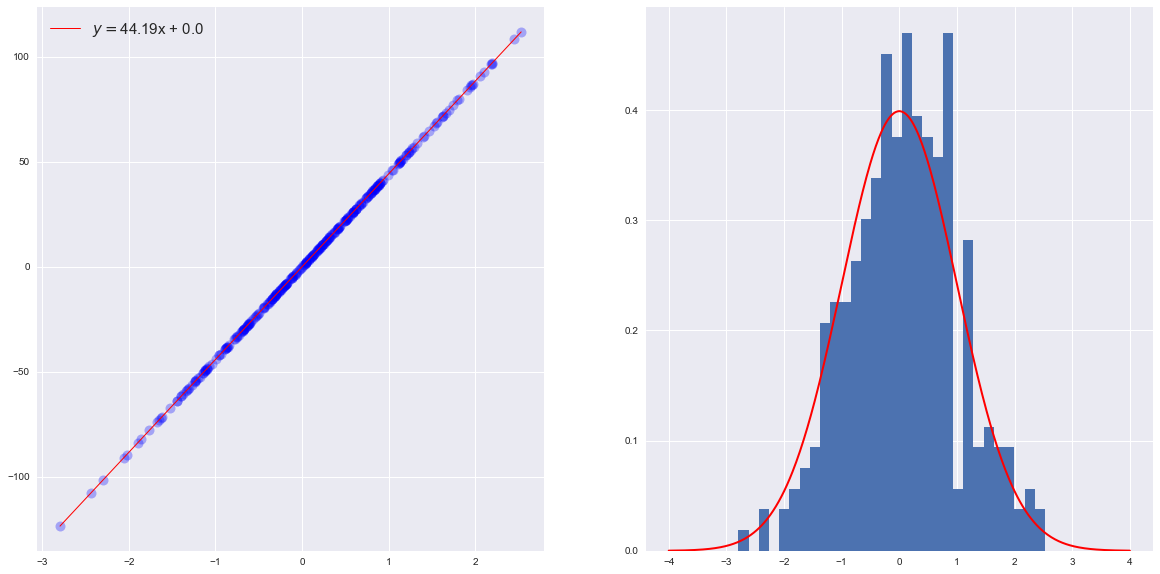

In [2]:
bias = 0.0
noise = 0
X, y, w = make_regression(
    n_samples=300, n_features=1, bias=bias,
    noise=noise, coef=True, random_state=1)

%matplotlib inline

# plot dataset
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(X[:, 0], y, 'bo', alpha=0.3, markersize=10)
ax[0].plot([min(X[:,0]), max(X[:,0])], [min(y), max(y)],
           linewidth=1, color='r',
           label = r'$y = $' + str(np.round(w, 2)) +
           'x + ' + str(np.round(bias, 3)))
ax[0].legend(loc = 'upper left', fontsize = 15)

# draw histogram and normal distribution
mu, std = 0, 1
x = np.linspace(-4+mu, 4+mu, 500)
count, bins, ignored = plt.hist(X[:, 0], 30, density=True)
ax[1].plot(x, 1/(std*np.sqrt(2*np.pi)) * 
           np.exp(-(x-mu)**2 / (2 * std**2)),
           linewidth=2, color='r')

In [3]:
print(w)

44.19042807484234


### (2) make_regression() : 1차원 dataset

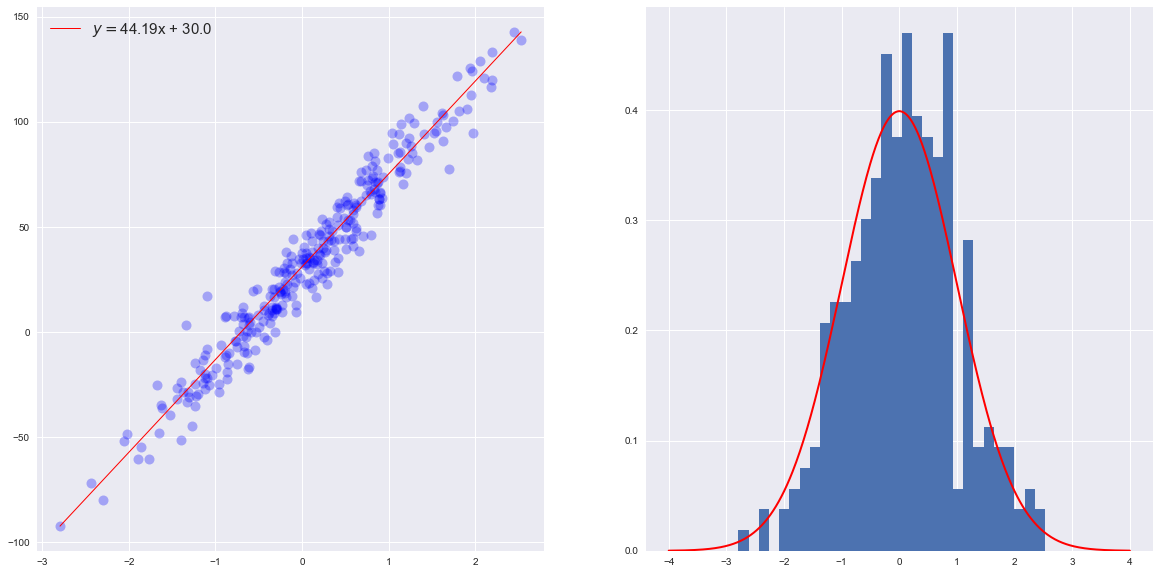

In [4]:
bias = 30.0
noise = 10.0
X, y, w = make_regression(
    n_samples=300, n_features=1, bias=bias,
    noise=noise, coef=True, random_state=1)

%matplotlib inline

# plot dataset
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(X[:, 0], y, 'bo', alpha=0.3, markersize=10)
ax[0].plot([min(X[:,0]), max(X[:,0])], [min(y), max(y)],
           linewidth=1, color='r',
           label = r'$y = $' + str(np.round(w, 2)) +
           'x + ' + str(np.round(bias, 3)))
ax[0].legend(loc = 'upper left', fontsize = 15)

# draw histogram and normal distribution
mu, std = 0, 1
x = np.linspace(-4+mu, 4+mu, 500)
count, bins, ignored = plt.hist(X[:, 0], 30, density=True)
ax[1].plot(x, 1/(std*np.sqrt(2*np.pi)) * 
           np.exp(-(x-mu)**2 / (2 * std**2)),
           linewidth=2, color='r')

### (3) make_regression() : 2차원 dataset

In [5]:
bias = 30.0
noise = 10.0
X, y, w = make_regression(
    n_samples=300, n_features=2, bias=bias,
    noise=noise, coef=True, random_state=1)

## plot dataset
%matplotlib qt
fig, ax = plt.subplots(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y)

X1, X2 = np.meshgrid(np.linspace(min(X[:,0]), max(X[:,0]),100),
                   np.linspace(min(X[:,1]), max(X[:,1]),100))

z = X1*w[0] + X2*w[1] + bias
ax.plot_surface(X1, X2, z, rstride=1, cstride=1, color='none', alpha=0.4)
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='g', marker = '.')
ax.legend([fake2Dline], [r'$y = $' + str(round(w[0], 2)) + r'$x_{1}$ + ' + str(round(w[1], 2)) + r'$x_{2}$ + ' + str(round(bias, 2))], numpoints = 1, fontsize=20)

## draw histogram
mu1, std1, mu2, std2 = 0, 1, 0, 1

hist, x1edges, x2edges = np.histogram2d(X[:, 0], X[:, 1], bins=30, range=[[-4+mu1, 4+mu1], [-4+mu2, 4+mu2]])
x1pos, x2pos = np.meshgrid(x1edges[:-1] + 0.25, x2edges[:-1] + 0.25, indexing="ij")
x1pos = x1pos.ravel()
x2pos = x2pos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
fig, ax = plt.subplots(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.bar3d(x1pos, x2pos, zpos, dx, dy, dz, zsort='average')

## draw normal distribution
x, y = np.mgrid[-4.0:4.0:30j, -4.0:4.0:30j]

# Need an (N, 2) array of (x, y) pairs
xy = np.column_stack([x.flat, y.flat])

mu = np.array([mu1, mu2])
sigma = np.array([std1, std2])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid
z = z.reshape(x.shape)

fig, ax = plt.subplots(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
#ax.plot_surface(x,y,z)
ax.plot_wireframe(x, y, z)